# Predicting Taxa with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

from micropyome.taxa import regression

## Obtain Data

In [2]:
DATASET_PATH = "data/averill_processed/bacteria/"

In [3]:
X = {}
Y = {}
for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/15_variables.csv")
    if level == 'fg':
        y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv")
    else:
        y = pd.read_csv(f"{DATASET_PATH}{level}/y_11groupTaxo.csv")

    x = x.drop(x.columns[0], axis=1)
    # x = StandardScaler().fit_transform(x)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [4]:
X["fg"].head()

,latitude,longitude,depth_max,forest,map,map_sd,mat,mat_sd,map_CV,mat_CV,mdr,aridity,NPP,relEM,pH
0,53.444053,-2.214306,10.0,0,0.831,0.048290,9.633333,1.257395,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.65
1,53.444053,-2.214306,10.0,0,0.831,0.046998,9.633333,1.217851,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.67
2,53.444053,-2.214306,10.0,0,0.831,0.048770,9.633333,1.222167,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.45
3,53.444053,-2.214306,10.0,0,0.831,0.048297,9.633333,1.263030,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.56
4,53.444053,-2.214306,10.0,0,0.831,0.047610,9.633333,1.265757,18.28125,450.486266,7.25,1.381,0.675,0.898121,7.64


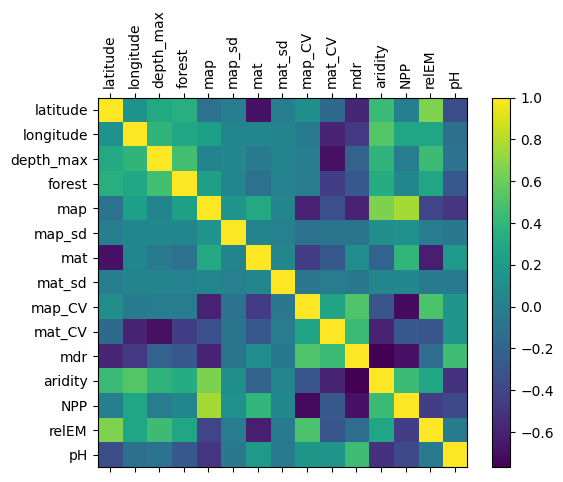

In [5]:
ex = X["fg"].copy()
from micropyome.datasets import normalize
normalize(ex)
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(ex.corr())
fig.colorbar(cax)
labels = ex.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.show()

In [6]:
Y["fg"].head()

,other,assim_nitrate_reduction,assim_nitrite_reduction,cellulolytic,chitinolytic,copiotroph,denitrification,dissim_nitrate_reduction,dissim_nitrite_reduction,lignolytic,methanotroph,n_fixation,nitrification,oligotroph
0,0.893046,0.000957,0.002588,0.002595,0.002333,0.037817,0.003547,0.003358,0.005295,0.002366,0.000083,0.006273,0.000286,0.039454
1,0.889777,0.000788,0.004186,0.001942,0.002881,0.035736,0.003214,0.004851,0.004819,0.001714,0.000155,0.006312,0.000527,0.043100
2,0.848038,0.002428,0.006368,0.006620,0.003244,0.053938,0.008511,0.013298,0.005656,0.000937,0.000637,0.013354,0.000244,0.036729
3,0.866138,0.003326,0.004454,0.002900,0.003436,0.044006,0.005105,0.008007,0.008106,0.001687,0.000110,0.013447,0.000876,0.038404
4,0.885077,0.001408,0.000693,0.003014,0.001311,0.021446,0.004757,0.004836,0.004989,0.000560,0.000360,0.008940,0.000809,0.061803


## Create and Train Models

In [7]:
models = {
    "k-NN": KNeighborsRegressor(20),
    "Linear Regression": LinearRegression(),
    #  "Decision Tree": DecisionTreeRegressor(),
    #  "Random Forest": RandomForestRegressor(),
    #  "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
    #  "Kernel Ridge": KernelRidge()
}

In [8]:
results = regression.train_evaluate_models_multiple_taxa(models, X, Y, "other", 0.01, 5)

2024-05-16T17:58:57.180961 > INFO Evaluating 2 models with 5 splits.
2024-05-16T17:58:57.184257 > INFO Level: fg
2024-05-16T17:58:57.187583 > INFO K-fold split: 0
2024-05-16T17:58:57.192873 > INFO Beginning the evaluation of 2 models.
2024-05-16T17:58:57.220808 >     Evaluated the model `k-NN`.
2024-05-16T17:58:57.350924 >     Evaluated the model `Linear Regression`.
2024-05-16T17:58:57.354947 > INFO K-fold split: 1
2024-05-16T17:58:57.361395 > INFO Beginning the evaluation of 2 models.
2024-05-16T17:58:57.380054 >     Evaluated the model `k-NN`.
2024-05-16T17:58:57.439803 >     Evaluated the model `Linear Regression`.
2024-05-16T17:58:57.440872 > INFO K-fold split: 2
2024-05-16T17:58:57.447511 > INFO Beginning the evaluation of 2 models.
2024-05-16T17:58:57.461068 >     Evaluated the model `k-NN`.
2024-05-16T17:58:57.480718 >     Evaluated the model `Linear Regression`.
2024-05-16T17:58:57.490905 > INFO K-fold split: 3
2024-05-16T17:58:57.491810 > INFO Beginning the evaluation of 2 mo

In [9]:
averill_results = pd.read_csv(f"{DATASET_PATH}/r2_published_results.csv")
published_results = averill_results.iloc[0].to_list()[1:]

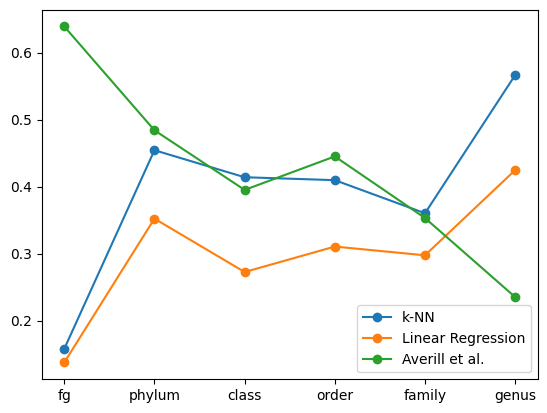

In [10]:
x = list(range(len(regression.TAXONOMIC_LEVELS)))

for model in models:
    y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
    plt.plot(x, y, "-o", label=model)

plt.plot(x, published_results, "-o", label="Averill et al.")
plt.xticks(x, regression.TAXONOMIC_LEVELS)
plt.legend()
plt.show()

## Transfer Learning

In [40]:
DATASET_PATH = "data/averill_processed/fungi/"
X = {}
Y = {}
for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/13_variables.csv")
    y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv")

    x = x.drop(x.columns[0], axis=1)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [31]:
models = {
    "k-NN": lambda: KNeighborsRegressor(20),
    "Linear Regression": lambda: LinearRegression(),
    #  "Decision Tree": DecisionTreeRegressor(),
    #  "Random Forest": RandomForestRegressor(),
    #  "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
    #  "Kernel Ridge": KernelRidge()
}
trained_models = {}
for level in regression.TAXONOMIC_LEVELS:
    trained_models[level] = {}
    for model in models:
        trained_models[level][model] = models[model]()
        trained_models[level][model].fit(X[level], Y[level])

In [41]:
TRANSFER_DATASET_PATH = "data/averill_tranfer"
SAMPLING_LEVELS = ["core", "plot", "site"]

X2 = {}
Y2 = {}
averill_results = {}

for level in regression.TAXONOMIC_LEVELS:
    X2[level] = {}
    Y2[level] = {}
    averill_results[level] = {}
    for sampling in SAMPLING_LEVELS:
        x = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Variables/{level}_{sampling}_13Var.csv", delimiter=";")
        x = x.drop(x.columns[0], axis=1)
        y = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Observed/{level}_{sampling}_observed.csv")
        y = y.drop(y.columns[0], axis=1)
        z = pd.read_csv(f"{TRANSFER_DATASET_PATH}/Predicted/{level}_{sampling}_predicted.csv")
        z = z.drop(z.columns[0], axis=1)
        X2[level][sampling] = x
        Y2[level][sampling] = y
        averill_results[level][sampling] = z

In [33]:
X2["fg"]["core"].head()

,pC,cn,pH,NPP,map,mat,forest,conifer,relEM,P,K,Ca,Mg
0,18.671149,26.312602,4.716984,0.568,1237,5.8375,1,1,1.533274,1.844684,0.716668,1.353845,0.637911
1,18.671149,26.312602,4.716984,0.568,1237,5.8375,1,1,1.533274,1.844684,0.716668,1.353845,0.637911
2,18.671149,26.312602,4.716984,0.568,1237,5.8375,1,1,1.533274,1.844684,0.716668,1.353845,0.637911
3,18.671149,26.312602,4.716984,0.568,1237,5.8375,1,1,1.533274,1.844684,0.716668,1.353845,0.637911
4,20.468578,24.950765,4.360810,0.568,1237,5.8375,1,1,0.697756,1.623174,0.714114,1.733240,0.890846


In [34]:
Y2["fg"]["core"].head()

,other,Saprotroph,Ectomycorrhizal,Wood_Saprotroph,Animal_Pathogen,Plant_Pathogen
0,0.278330,0.169980,0.547714,0.001988,0.000994,0.000994
1,0.088469,0.344930,0.545726,0.012922,0.000994,0.006958
2,0.000994,0.007952,0.988072,0.000994,0.000994,0.000994
3,0.772366,0.075547,0.143141,0.006958,0.000994,0.000994
4,0.380716,0.147117,0.441352,0.028827,0.000994,0.000994


In [35]:
averill_results["fg"]["core"].head()

,mean.other,mean.Saprotroph,mean.Ectomycorrhizal,mean.Wood_Saprotroph,mean.Animal_Pathogen,mean.Plant_Pathogen
0,0.169523,0.349924,0.318562,0.095838,0.030913,0.035241
1,0.169948,0.350793,0.317564,0.095564,0.030968,0.035163
2,0.171233,0.351855,0.315821,0.094760,0.031213,0.035119
3,0.171406,0.349828,0.316899,0.095593,0.031033,0.035241
4,0.197384,0.427429,0.180244,0.115199,0.034781,0.044962


In [36]:
results = {}

for level in regression.TAXONOMIC_LEVELS:
    results[level] = {}
    for sampling in SAMPLING_LEVELS:
        results[level][sampling] = np.mean(
            regression.r2_score_by_column(
                Y2[level][sampling], averill_results[level][sampling]
            )
        )

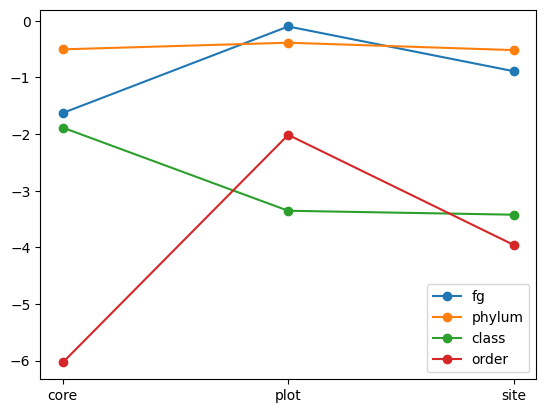

In [37]:
x = list(range(len(SAMPLING_LEVELS)))

for level in results:
    y = [results[level][sampling] for sampling in results[level]]
    if sum(y) < -500:
        continue
    plt.plot(x, y, "-o", label=level)

plt.xticks(x, SAMPLING_LEVELS)
plt.legend()
plt.show()

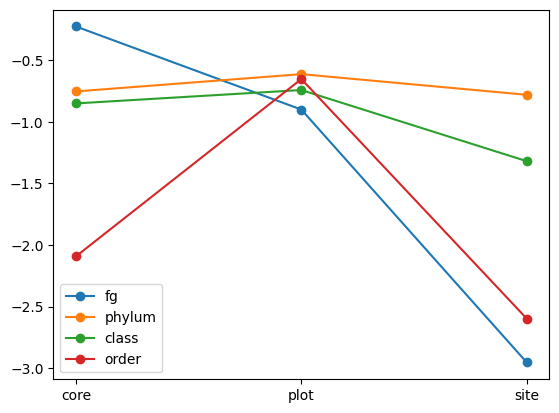

In [44]:
x = list(range(len(SAMPLING_LEVELS)))

model_name = "k-NN"

for level in regression.TAXONOMIC_LEVELS:
    if level == "genus":
        continue
    r = []
    for sampling in SAMPLING_LEVELS:
        y = Y2[level][sampling]
        y_pred = trained_models[level][model_name].predict(X2[level][sampling])
        r2 = regression.r2_score_by_column(y, y_pred)
        r.append(np.mean(r2))
    if sum(r) < -500:
        continue
    plt.plot(x, r, "-o", label=level)

plt.xticks(x, SAMPLING_LEVELS)
plt.legend()
plt.show()